In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
import json
from cycler import cycler

In [2]:
files = glob.glob('../data/transactions/collect_transactions*.json')+\
    glob.glob('../data/transactions/tmp/collect_transactions*.json')

def read(f):
    j = pd.read_json(f)
    if len(j) == 0:
        return pd.DataFrame()
    return j.set_index('id') \
        [['level', 'timestamp', 'sender', 'gasLimit', 'gasUsed', 'storageLimit', 'storageUsed', 'bakerFee', 'storageFee', 'allocationFee', 'amount', 'parameter', 'status' ]]

tr = pd.concat(map(read, files))

# This contract doesn't have creator / royalties, and is_primary won't work
#../data/transactions/swap_transactions_KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9_90000-100000.json')

def get_address(j):
    return j['address']

def get_swap_id(j):
    return j['value']['swap_id'] if 'swap_id' in j['value'] else j['value']

def get_objkt_amt(d):
    return d['value']['objkt_amt']

def get_tez(d):
    return d / 10**6

tr['sender'] = tr['sender'].apply(get_address)
tr['swap_id'] = tr['parameter'].apply(get_swap_id)
tr['H=N'] = tr['amount'].apply(get_tez)
tr.head()

,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,swap_id,H=N
id,,,,,,,,,,,,,,,
58603121,1546298,2021-07-07 04:05:18+00:00,tz1Y1j7FK1X9Rrv2VdPz5bXoU7SszF8W1RnK,88446,56363,0,0,9154,0,0,15000000,"{'entrypoint': 'collect', 'value': '500016'}",applied,500016,15.0
58603571,1546305,2021-07-07 04:12:18+00:00,tz1Y1j7FK1X9Rrv2VdPz5bXoU7SszF8W1RnK,88446,56363,310,0,9153,0,0,10000000,"{'entrypoint': 'collect', 'value': '500019'}",applied,500019,10.0
58607218,1546363,2021-07-07 05:10:18+00:00,tz1XEJFTcKBmQrQHgAEsQ4UUWfk1FMnG5SeA,87417,56363,640,0,9049,0,0,1000000,"{'entrypoint': 'collect', 'value': '500045'}",applied,500045,1.0
58607255,1546364,2021-07-07 05:11:18+00:00,tz1KgTRWWqutpmCn3NJePZfpiCpw2QntHGFK,87417,56363,310,0,9050,0,0,3000000,"{'entrypoint': 'collect', 'value': '500044'}",applied,500044,3.0
58607302,1546365,2021-07-07 05:12:18+00:00,tz1bGYiDKFwR4EAgF77LQtek1t9mMqazSyLb,87417,56363,310,0,9050,0,0,3000000,"{'entrypoint': 'collect', 'value': '500044'}",applied,500044,3.0


In [3]:
tr['amount'].sum() / 10**6

8168551.412985

In [4]:
volume = tr.groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).sum()['H=N']
volume

timestamp
2021-03-01 00:00:00+00:00      498.500030
2021-03-02 00:00:00+00:00     1186.000000
2021-03-03 00:00:00+00:00     2318.234817
2021-03-04 00:00:00+00:00     1271.080510
2021-03-05 00:00:00+00:00     2958.712417
                                 ...     
2021-10-02 00:00:00+00:00    53278.389460
2021-10-03 00:00:00+00:00    45103.567908
2021-10-04 00:00:00+00:00    60793.020115
2021-10-05 00:00:00+00:00    53155.779327
2021-10-06 00:00:00+00:00     7289.997400
Freq: D, Name: H=N, Length: 220, dtype: float64

In [5]:
files = glob.glob('../data/transactions/ask_transactions*.json')+\
    glob.glob('../data/transactions/tmp/ask_transactions*.json')
print(files)

def read(f):
    return pd.read_json(f) \
        .set_index('id') \
        [['level', 'timestamp', 'sender', 'gasLimit', 'gasUsed', 'storageLimit', 'storageUsed', 'bakerFee', 'storageFee', 'allocationFee', 'amount', 'parameter', 'status' ]]

tr = pd.concat(map(read, files))

# This contract doesn't have creator / royalties, and is_primary won't work
#../data/transactions/swap_transactions_KT1Hkg5qeNhfwpKW4fXvq7HGZB9z2EnmCCA9_90000-100000.json')

def get_address(j):
    return j['address']

def get_entrypoint(d):
    return d['entrypoint']

def get_tez(d):
    return d / 10**6

def get_value(d):
    return d['value']

tr['sender'] = tr['sender'].apply(get_address)
tr['entrypoint'] = tr['parameter'].apply(get_entrypoint)
tr['value'] = tr['parameter'].apply(get_value)
tr['objkt_com'] = tr['amount'].apply(get_tez)
display(tr.tail())

objkt_volume = tr.groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).sum()['objkt_com']
objkt_volume

['../data/transactions\\ask_transactions_KT1FvqJwEDWb1Gwc55Jd1jjTHRVWbYKUUpyq_0-10000.json', '../data/transactions/tmp\\ask_transactions_KT1FvqJwEDWb1Gwc55Jd1jjTHRVWbYKUUpyq_10000-17525.json']


,level,timestamp,sender,gasLimit,gasUsed,storageLimit,storageUsed,bakerFee,storageFee,allocationFee,amount,parameter,status,entrypoint,value,objkt_com
id,,,,,,,,,,,,,,,,
91398580,1753075,2021-10-06 06:14:46+00:00,tz1gqYvFupx3HAFsCXYgVybYpms3qv63UE7n,22720,12266,310,0,2584,0,0,17000000,"{'entrypoint': 'fulfill_ask', 'value': '47775'}",applied,fulfill_ask,47775,17.00
91398717,1753076,2021-10-06 06:15:16+00:00,tz1RPZp6NLzn7x4g7jhqHtCkhCQVnhbVMj8y,22720,12266,310,0,2584,0,0,10000000,"{'entrypoint': 'fulfill_ask', 'value': '49387'}",applied,fulfill_ask,49387,10.00
91399438,1753080,2021-10-06 06:18:26+00:00,tz1gqYvFupx3HAFsCXYgVybYpms3qv63UE7n,22720,12266,310,0,2584,0,0,16990000,"{'entrypoint': 'fulfill_ask', 'value': '49535'}",applied,fulfill_ask,49535,16.99
91400871,1753088,2021-10-06 06:25:56+00:00,tz1R5W8dD7NihSDffsGwbYD9xYocPM8B348j,22720,12266,310,0,2584,0,0,39900000,"{'entrypoint': 'fulfill_ask', 'value': '48523'}",applied,fulfill_ask,48523,39.90
91400876,1753088,2021-10-06 06:25:56+00:00,tz1hyL48Gc3BGEsg18picudUX6vBFhNHJsyj,22785,12351,310,0,2566,0,0,18000000,"{'entrypoint': 'fulfill_ask', 'value': '48131'}",applied,fulfill_ask,48131,18.00


timestamp
2021-07-01 00:00:00+00:00      591.9569
2021-07-02 00:00:00+00:00     2398.5130
2021-07-03 00:00:00+00:00     3111.0100
2021-07-04 00:00:00+00:00     1707.0800
2021-07-05 00:00:00+00:00     3600.9230
                                ...    
2021-10-02 00:00:00+00:00    11640.8999
2021-10-03 00:00:00+00:00     9588.6706
2021-10-04 00:00:00+00:00    18926.0210
2021-10-05 00:00:00+00:00    12576.1080
2021-10-06 00:00:00+00:00      959.5600
Freq: D, Name: objkt_com, Length: 98, dtype: float64

C:\Users\tim\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


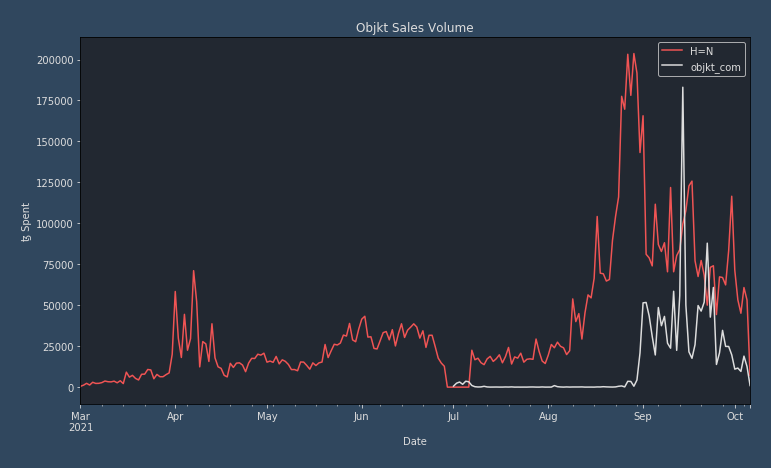

In [7]:
c1 = '#222831'
c2 = '#30475E'
c3 = '#F05454'
c4 = '#DDDDDD'

plt.rcParams.update({
    "figure.facecolor":  c2,
    "axes.facecolor":    c1,
    "text.color": c4,
    "axes.labelcolor": c4,
    "xtick.color":  c4,
    "ytick.color":  c4,
    "grid.color":  c4,
    "savefig.pad_inches": 0.3,
})

color_cycler = cycler('color', [c3, c4])
plt.rc('axes', prop_cycle=color_cycler)

volume.plot(figsize=(12,6.75))
objkt_volume.plot(figsize=(12,6.75))

plt.xlabel('Date')
plt.ylabel(f'ꜩ Spent')
plt.legend()
_ = plt.title(f'Objkt Sales Volume')